In [1]:
# Load required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import seaborn as sns
import sys
sys.setrecursionlimit(1500)
%matplotlib inline

In [2]:
data = pd.read_csv('최종데이터/createimage_train_16features.csv')
data

,text,special_ratio,number_ratio,url_count,upper_ratio,blank_ratio,crlf_ratio,Noun,Pronoun,Verb,Adjective,Adverb,avg_word_sentences,avg_char_sentences,avg_word_paragraphs,avg_char_paragraphs,label
0,\nLowest Price Guarantee\nFast Delivery\nDo no...,0.348293,0.273680,3,0.078195,0.461075,0.622756,0.467456,0.029586,0.041420,0.023669,0.035503,0.207692,0.154133,0.030352,0.028798,spam
1,\nWATCH OUT!\nSBNS MAKES A MOVE!\nWATCH SBNS T...,0.308076,0.150065,3,0.316315,0.548901,0.197618,0.554217,0.012048,0.048193,0.030120,0.018072,0.065562,0.062779,0.187916,0.217558,spam
2,\nHOUSEHOLD\n??Perfect\nfor homes\nwith pets\n...,0.191008,0.110476,0,0.089353,0.530797,0.354296,0.474201,0.017199,0.063882,0.095823,0.014742,0.092189,0.077154,0.110133,0.117120,spam
3,\nCitytv\nCityflows\nCLAUDE\nPRESBYTERIAN CHUR...,0.053855,0.000000,0,0.495795,0.519610,0.313218,0.600000,0.057143,0.085714,0.057143,0.028571,0.109231,0.108893,0.036632,0.040339,spam
4,"\n""I THINK A\nMARRIAGE IS AS\nA MARRIAGE HAS A...",0.418946,0.047804,0,0.560527,0.703269,0.444369,0.384615,0.076923,0.115385,0.000000,0.019231,0.107692,0.053651,0.017364,0.012580,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,\n$125 Worth of Pleasure for $25\nThe Miller T...,0.179160,0.026770,0,0.048878,0.766636,0.202188,0.344828,0.055172,0.103448,0.048276,0.055172,0.115000,0.084341,0.026070,0.022727,ham
1169,\nTrading alert!\nYou may not be aware of AUNI...,0.308426,0.150220,0,0.098854,0.677674,0.314188,0.292857,0.071429,0.171429,0.057143,0.035714,0.163077,0.107984,0.069458,0.063175,spam
1170,"\nDon't waste your time and money, save up to ...",0.405285,0.029586,2,0.095166,0.611906,0.275021,0.395161,0.040323,0.088710,0.145161,0.048387,0.029451,0.024812,0.039486,0.040339,spam
1171,\nTHANK YOU ALL FOR 100 FOLLOWERS!\nLETS DO A ...,0.193045,0.071355,0,0.371948,0.698416,0.165822,0.571429,0.035714,0.107143,0.035714,0.000000,0.012308,0.007616,0.022360,0.021195,spam


In [3]:
NEWLINE = '\n'

def token_count(row):
    'returns token count'
    text=row['tokenized_text']
    length=len(text.split())
    return length

def tokenize(row):
    "tokenize the text using default space tokenizer"
    text=row['text']
    lines=(line for line in text.split(NEWLINE) )
    tokenized=""
    for sentence in lines:
        tokenized+= " ".join(tok for tok in sentence.split())
    return tokenized

In [4]:
data['tokenized_text']=data.apply(tokenize, axis=1)
data['token_count']=data.apply(token_count, axis=1)
data['lang']='en'
data.head()

,text,special_ratio,number_ratio,url_count,upper_ratio,blank_ratio,crlf_ratio,Noun,Pronoun,Verb,Adjective,Adverb,avg_word_sentences,avg_char_sentences,avg_word_paragraphs,avg_char_paragraphs,label,tokenized_text,token_count,lang
0,\nLowest Price Guarantee\nFast Delivery\nDo no...,0.348293,0.273680,3,0.078195,0.461075,0.622756,0.467456,0.029586,0.041420,0.023669,0.035503,0.207692,0.154133,0.030352,0.028798,spam,Lowest Price GuaranteeFast DeliveryDo not clic...,96,en
1,\nWATCH OUT!\nSBNS MAKES A MOVE!\nWATCH SBNS T...,0.308076,0.150065,3,0.316315,0.548901,0.197618,0.554217,0.012048,0.048193,0.030120,0.018072,0.065562,0.062779,0.187916,0.217558,spam,WATCH OUT!SBNS MAKES A MOVE!WATCH SBNS TRADE O...,122,en
2,\nHOUSEHOLD\n??Perfect\nfor homes\nwith pets\n...,0.191008,0.110476,0,0.089353,0.530797,0.354296,0.474201,0.017199,0.063882,0.095823,0.014742,0.092189,0.077154,0.110133,0.117120,spam,HOUSEHOLD??Perfectfor homeswith petssuper stea...,269,en
3,\nCitytv\nCityflows\nCLAUDE\nPRESBYTERIAN CHUR...,0.053855,0.000000,0,0.495795,0.519610,0.313218,0.600000,0.057143,0.085714,0.057143,0.028571,0.109231,0.108893,0.036632,0.040339,spam,CitytvCityflowsCLAUDEPRESBYTERIAN CHURCHTHERE ...,27,en
4,"\n""I THINK A\nMARRIAGE IS AS\nA MARRIAGE HAS A...",0.418946,0.047804,0,0.560527,0.703269,0.444369,0.384615,0.076923,0.115385,0.000000,0.019231,0.107692,0.053651,0.017364,0.012580,ham,"""I THINK AMARRIAGE IS ASA MARRIAGE HAS ALWAYS ...",31,en


In [5]:
# Lets look at some information related to the data
df=data
print("total emails : ", len(df))
print  ("total spam emails : ", len(df[df['label']=='spam']) )
print  ("total normal emails : ", len(df[df['label']=='ham']) )

total emails :  1173
total spam emails :  898
total normal emails :  275


Text(0.5, 1.0, 'Token length Vs Frequency for Enron Spam Emails')

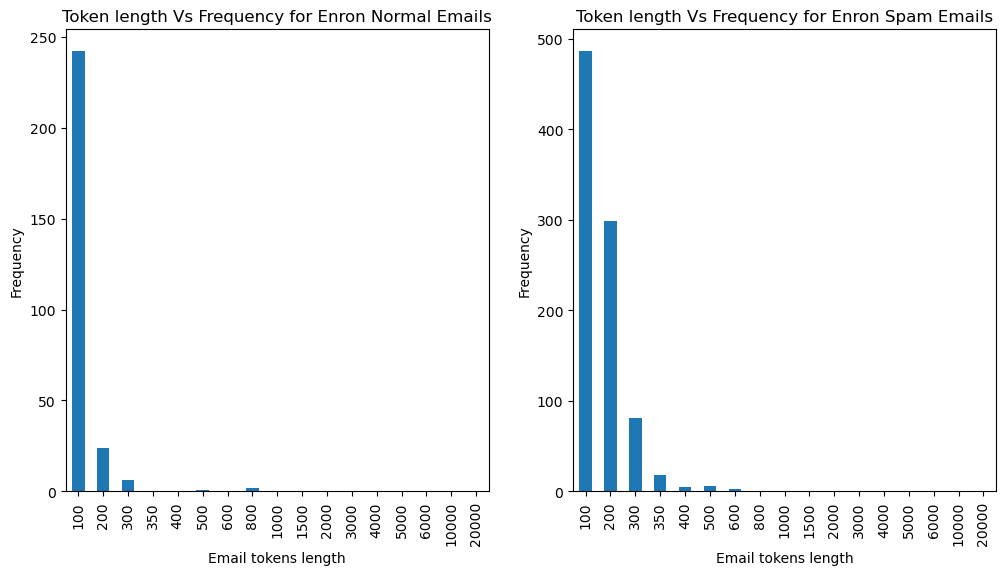

In [6]:
bins = [0,100,200,300,350,400,500,600,800,1000,1500,2000,3000,4000,5000,6000,10000,20000]


fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
fig.subplots_adjust(hspace=.5)

df_sub=df[ (df['lang']=='en') & (df['label']=='ham')]
df1 = df_sub.groupby(pd.cut(df_sub['token_count'], bins=bins)).token_count.count()
df1.index=[a.right for a in df1.index]
res1=df1.plot(kind='bar',ax=axes[0])
res1.set_xlabel('Email tokens length')
res1.set_ylabel('Frequency')
res1.set_title('Token length Vs Frequency for Enron Normal Emails')


df_sub=df[ (df['lang']=='en') & (df['label']=='spam')]
df1 = df_sub.groupby(pd.cut(df_sub['token_count'], bins=bins)).token_count.count()
df1.index=[a.right for a in df1.index]
res2=df1.plot(kind='bar',ax=axes[1])
res2.set_xlabel('Email tokens length')
res2.set_ylabel('Frequency')
res2.set_title('Token length Vs Frequency for Enron Spam Emails')

## Deep Learning Model 

In [7]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, concatenate, Flatten
from keras.callbacks import ModelCheckpoint, TensorBoard

# Create tf-idf model from the data

We will create tf-idf model with keras

In [8]:
# max number of features
num_max = 800

In [9]:
def train_tf_idf_model(texts):
    "train tf idf model "
    tic = time.process_time()
    

    tok = Tokenizer(num_words=num_max)
    tok.fit_on_texts(texts)
    toc = time.process_time()

    print (" -----total Computation time = " + str((toc - tic)) + " seconds")
    return tok


def prepare_model_input(tfidf_model,dataframe,mode='tfidf'):
    
    "function to prepare data input features using tfidf model"
    tic = time.process_time()
    
    le = LabelEncoder()
    sample_texts = list(dataframe['tokenized_text'])
    sample_texts = [' '.join(x.split()) for x in sample_texts]
    
    targets=list(dataframe['label'])
    targets = [1. if x=='spam' else 0. for x in targets]
    sample_target = le.fit_transform(targets)
    
    if mode=='tfidf':
        sample_texts=tfidf_model.texts_to_matrix(sample_texts,mode='tfidf')
    else:
        sample_texts=tfidf_model.texts_to_matrix(sample_texts)
    
    toc = time.process_time()
    
    print('shape of labels: ', sample_target.shape)
    print('shape of data: ', sample_texts.shape)
    
    print (" -----total Computation time for preparing model data = " + str((toc - tic)) + " seconds")
    
    return sample_texts,sample_target

In [10]:
texts=list(df['tokenized_text'])
tfidf_model=train_tf_idf_model(texts)

 -----total Computation time = 0.203125 seconds


In [11]:
# prepare model input data
mat_texts,tags = prepare_model_input(tfidf_model,df,mode='tfidf')

shape of labels:  (1173,)
shape of data:  (1173, 800)
 -----total Computation time for preparing model data = 0.65625 seconds


In [12]:
df_model = df

In [13]:
#special_ratio = np.array(df_model['special_ratio'])
number_ratio = np.array(df_model['number_ratio'])
#url_count = np.array(df_model['url_count'])
upper_ratio = np.array(df_model['upper_ratio'])
#blank_ratio = np.array(df_model['blank_ratio'])
crlf_ratio = np.array(df_model['crlf_ratio'])
#Noun = np.array(df_model['Noun'])
Pronoun = np.array(df_model['Pronoun'])
#Verb = np.array(df_model['Verb'])
Adjective = np.array(df_model['Adjective'])
#Adverb = np.array(df_model['Adverb'])
#avg_word_sentences = np.array(df_model['avg_word_sentences'])
#avg_char_sentences = np.array(df_model['avg_char_sentences'])
#avg_word_paragraphs = np.array(df_model['avg_word_paragraphs'])
#avg_char_paragraphs = np.array(df_model['avg_char_paragraphs'])

# 텍스트 입력 레이어
text_input = Input(shape=(num_max,), name='text_input')

# 특수문자, 숫자 개수, URL 개수 입력 레이어
#special_ratio_input = Input(shape=(1,), name='special_ratio_input')
number_ratio_input = Input(shape=(1,), name='number_ratio_input')
#url_count_input = Input(shape=(1,), name='url_count_input')
upper_ratio_input = Input(shape=(1,), name='upper_ratio_input')
#blank_ratio_input = Input(shape=(1,), name='blank_ratio_input')
crlf_ratio_input = Input(shape=(1,), name='crlf_ratio_input')
#Noun_input = Input(shape=(1,), name='Noun_input')
Pronoun_input = Input(shape=(1,), name='Pronoun_input')
#Verb_input = Input(shape=(1,), name='Verb_input')
Adjective_input = Input(shape=(1,), name='Adjective_input')
#Adverb_input = Input(shape=(1,), name='Adverb_input')
#avg_word_sentences_input = Input(shape=(1,), name='avg_word_sentences_input')
#avg_char_sentences_input = Input(shape=(1,), name='avg_char_sentences_input')
#avg_word_paragraphs_input = Input(shape=(1,), name='avg_word_paragraphs_input')
#avg_char_paragraphs_input = Input(shape=(1,), name='avg_char_paragraphs_input')

# 텍스트 입력 레이어와 나머지 입력 레이어들을 결합
merged_input = concatenate([text_input, number_ratio_input, upper_ratio_input, crlf_ratio_input, Pronoun_input, Adjective_input])

# Split Train/validation data 

We will use 85% for training, 15% for validation. 

In [14]:
# 학습 데이터와 테스트 데이터로 분할
from sklearn.model_selection import train_test_split
text_train, text_val, number_ratio_train, number_ratio_val, upper_ratio_train, upper_ratio_val, crlf_ratio_train, crlf_ratio_val, Pronoun_train, Pronoun_val, Adjective_train, Adjective_val, tags_train, tags_val = train_test_split(mat_texts , number_ratio, upper_ratio, crlf_ratio, Pronoun, Adjective, tags, test_size=0.15, random_state=42)

In [15]:
text_train

array([[0.        , 1.52840189, 2.03511828, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.90269878, 0.77990676, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.77990676, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.52840189, 1.32049694, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.52840189, 1.63672192, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Build models



In [16]:
## Define and initialize the network
model_save_path="checkpoints/spam_detector_enron_model11.h5"

In [17]:
def get_simple_model():
    # 은닉층과 출력층 설정
    hidden_layer = Dense(64, activation='relu')(merged_input)
    output_layer = Dense(1, activation='sigmoid', name='output')(hidden_layer)

    # 모델 생성
    model = Model(inputs=[text_input, number_ratio_input, upper_ratio_input, crlf_ratio_input, Pronoun_input, Adjective_input], outputs=output_layer)

    # 모델 요약
    model.summary()

    # 모델 컴파일
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print('compile done')
    return model


def check_model2(model,x_train,y_train,x_val,y_val,epochs=10):
    history=model.fit(x_train, y_train, epochs=epochs, batch_size=64, verbose=1,
                      shuffle=True,
                      validation_data=(x_val, y_val),
                      callbacks=[checkpointer, tensorboard]).history
    return history

# define checkpointer
checkpointer = ModelCheckpoint(filepath=model_save_path,
                               verbose=1,
                               save_best_only=True)    

# define tensorboard
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)


# define the predict function for the deep learning model for later use
def predict(test_text, test_number, test_upper, test_crlf, test_pronoun, test_adjective):
    result=model.predict([test_text, test_number, test_upper, test_crlf, test_pronoun, test_adjective])
    prediction = [round(x[0]) for x in result]
    return prediction

In [18]:
# get the compiled model
model = get_simple_model()

# load history
# history=check_model(m,mat_texts,tags,epochs=10)
history=check_model2(model,[text_train, number_ratio_train, upper_ratio_train, crlf_ratio_train, Pronoun_train, Adjective_train], tags_train, [text_val, number_ratio_val, upper_ratio_val, crlf_ratio_val, Pronoun_val, Adjective_val], tags_val, epochs=30)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_input (InputLayer)     [(None, 800)]                0         []                            
                                                                                                  
 number_ratio_input (InputL  [(None, 1)]                  0         []                            
 ayer)                                                                                            
                                                                                                  
 upper_ratio_input (InputLa  [(None, 1)]                  0         []                            
 yer)                                                                                             
                                                                                              

C:\Users\JAE\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 0s 10ms/step - loss: 0.1739 - accuracy: 0.9428 - val_loss: 0.1790 - val_accuracy: 0.9318
Epoch 3/30
16/16 [==============================] - ETA: 0s - loss: 0.1146 - accuracy: 0.9769
Epoch 3: val_loss improved from 0.17899 to 0.14692, saving model to checkpoints\spam_detector_enron_model11.h5
16/16 [==============================] - 0s 11ms/step - loss: 0.1146 - accuracy: 0.9769 - val_loss: 0.1469 - val_accuracy: 0.9375
Epoch 4/30
12/16 [=====================>........] - ETA: 0s - loss: 0.0822 - accuracy: 0.9896
Epoch 4: val_loss improved from 0.14692 to 0.13159, saving model to checkpoints\spam_detector_enron_model11.h5
16/16 [==============================] - 0s 11ms/step - loss: 0.0788 - accuracy: 0.9890 - val_loss: 0.1316 - val_accuracy: 0.9602
Epoch 5/30
13/16 [=======================>......] - ETA: 0s - loss: 0.0592 - accuracy: 0.9988
Epoch 5: val_loss improved from 0.13159 to 0.12170, saving model to checkpoints\spam_detector_enron_model1

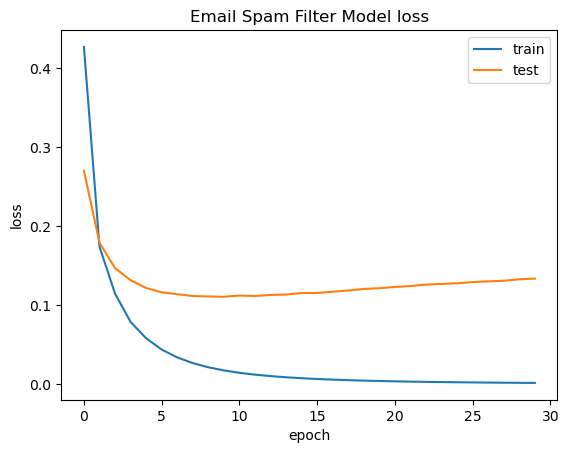

In [19]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Email Spam Filter Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

# Evaluate Model Performance

In [20]:
import sklearn
from sklearn import metrics
import joblib

In [48]:
df_unseen_test = pd.read_csv('최종데이터/collectimage_test_16features.csv')

In [49]:
df_unseen_test

,text,special_ratio,number_ratio,url_count,upper_ratio,blank_ratio,crlf_ratio,Noun,Pronoun,Verb,Adjective,Adverb,avg_word_sentences,avg_char_sentences,avg_word_paragraphs,avg_char_paragraphs,label
0,\nFeel young again with Regenisis HGH\nRegenis...,0.118319,0.028868,0,0.067479,0.290053,0.120768,0.362963,0.037037,0.140741,0.088889,0.044444,0.134549,0.136043,0.040308,0.044780,spam
1,\nSuperstar Stock Report\nSmart Money Equities...,0.129388,0.107814,2,0.159635,0.343152,0.030367,0.337097,0.074194,0.140323,0.051613,0.043548,0.126329,0.112799,0.182118,0.194045,spam
2,\nYOU'VE SEEN IT BEFORE YOU SAY? YOU AIN'T SEE...,0.194393,0.308285,0,0.276236,0.308322,0.528875,0.415842,0.016502,0.075908,0.046205,0.019802,0.066148,0.054741,0.099670,0.082251,spam
3,\n****! READ IT CAREFULLY!**\nNew Product Incr...,0.103499,0.041612,0,0.072706,0.334076,0.065231,0.341686,0.056948,0.125285,0.075171,0.041002,0.103684,0.101180,0.141810,0.145145,spam
4,\nDOE MEE\nDOE MEE DOE MEE DOE MEE DOE MEE DOE...,0.123539,0.087075,0,0.474921,0.408219,0.076128,0.581818,0.018182,0.036364,0.000000,0.018182,0.171220,0.135614,0.015024,0.011739,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,"\nGet QEGY First Thing On Monday Oct 23, This ...",0.147568,0.246343,0,0.209392,0.360201,0.055422,0.368421,0.010526,0.089474,0.036842,0.015789,0.096210,0.078858,0.054232,0.051699,spam
301,\n??Lowest Price Guarantee Fast Delivery\nFor ...,0.178926,0.270859,2,0.052989,0.371872,0.142004,0.271186,0.090395,0.124294,0.050847,0.045198,0.062253,0.053874,0.055332,0.048433,spam
302,\nLOUIS VUITTON\nPARIS\nmade in FranceUrgent -...,0.111481,0.530387,0,0.308901,0.275880,0.124529,0.500000,0.031250,0.031250,0.062500,0.000000,0.086876,0.094422,0.007329,0.008396,spam
303,\nFeel young again with Regenisis HGH\nRegenis...,0.288982,0.096482,2,0.060748,0.273385,0.124622,0.307500,0.030000,0.122500,0.075000,0.045000,0.214004,0.190966,0.106632,0.127420,spam


In [50]:
df_unseen_test['tokenized_text']=df_unseen_test.apply(tokenize, axis=1)
df_unseen_test['token_count']=df_unseen_test.apply(token_count, axis=1)
df_unseen_test['lang']='en'

In [51]:
#special_ratio = np.array(df_unseen_test['special_ratio'])
number_ratio = np.array(df_unseen_test['number_ratio'])
#url_count = np.array(df_unseen_test['url_count'])
upper_ratio = np.array(df_unseen_test['upper_ratio'])
#blank_ratio = np.array(df_unseen_test['blank_ratio'])
crlf_ratio = np.array(df_unseen_test['crlf_ratio'])
#Noun = np.array(df_unseen_test['Noun'])
Pronoun = np.array(df_unseen_test['Pronoun'])
#Verb = np.array(df_unseen_test['Verb'])
Adjective = np.array(df_unseen_test['Adjective'])
#Adverb = np.array(df_unseen_test['Adverb'])
#avg_word_sentences = np.array(df_unseen_test['avg_word_sentences'])
#avg_char_sentences = np.array(df_unseen_test['avg_char_sentences'])
#avg_word_paragraphs = np.array(df_unseen_test['avg_word_paragraphs'])
#avg_char_paragraphs = np.array(df_unseen_test['avg_char_paragraphs'])
sample_texts,sample_target=prepare_model_input(tfidf_model,df_unseen_test,mode='')

shape of labels:  (305,)
shape of data:  (305, 800)
 -----total Computation time for preparing model data = 0.109375 seconds


In [52]:
# lets write a function to create the dataframe of the results from all the models

model_dict={}
model_dict['deep_learning']=model


def getResults(model_dict, sample_texts, test_number, test_upper, test_crlf, test_pronoun, test_adjective, sample_target):
    '''
    Get results from different models
    '''
    results=[]
    
    results_cm={}
    
    for name,model in model_dict.items():
#         print(name)
        tic1 = time.process_time()
        if name in 'deep_learning':
            predicted_sample = predict(sample_texts, test_number, test_upper, test_crlf, test_pronoun, test_adjective)
        else:    
            predicted_sample = model.predict(sample_texts, test_number, test_upper, test_crlf, test_pronoun, test_adjective)
        toc1 = time.process_time()
#         print(predicted_sample)

        cm=sklearn.metrics.confusion_matrix(sample_target, predicted_sample)
        results_cm[name]=cm
        
        total=len(predicted_sample)
        TP = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]
        TN = cm[1][1]
        
        time_taken=round(toc1 - tic1,4)
        res=sklearn.metrics.precision_recall_fscore_support(sample_target, predicted_sample)
        results.append([name,np.mean(res[0]),np.mean(res[1]),np.mean(res[2]),total,TP,FP,FN,TN,str(time_taken)] )     
        
    
    df_cols=['model','precision','recall','f1_score','Total_samples','TP','FP','FN','TN','execution_time']
    result_df=pd.DataFrame(results,columns=df_cols)
    
    return result_df,results_cm

## Results

In [53]:
result_df,results_cm= getResults(model_dict, sample_texts, number_ratio, upper_ratio, crlf_ratio, Pronoun, Adjective, sample_target)
result_df

10/10 [==============================] - 0s 4ms/step


,model,precision,recall,f1_score,Total_samples,TP,FP,FN,TN,execution_time
0,deep_learning,0.785946,0.790105,0.787968,305,59,25,27,194,0.1875


In [27]:
def plot_heatmap(cm,title):
    df_cm2 = pd.DataFrame(cm, index = ['normal', 'spam'])
    df_cm2.columns=['normal','spam']

    ax = plt.axes()
    sns.heatmap(df_cm2, annot=True, fmt="d", linewidths=.5,ax=ax)
    ax.set_title(title)
    plt.show()
    return

### CM for Deep Learning Model

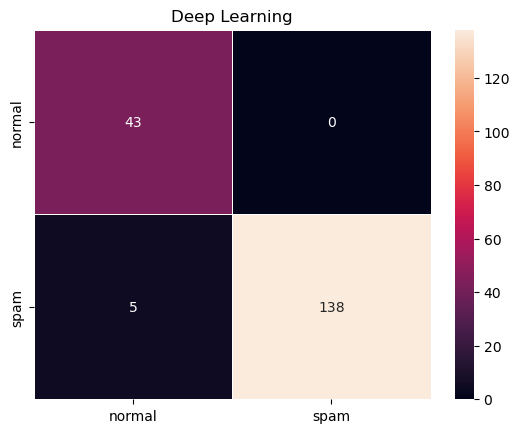

In [28]:
plot_heatmap(results_cm['deep_learning'],'Deep Learning')